# Boom Bikes Sharing Demand Analysis

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Business Goals 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps taken for analysis 

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

## Reading and analysing data 

In [223]:
data = pd.read_csv('day.csv', index_col='instant') 
#instant: record index

In [224]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


### data quality 

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


- No missing values

In [226]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [227]:
data.shape

(730, 15)

## drop unwanted data 

In [228]:
cleaned_data = data.drop(columns=['dteday','casual','registered'])

#'dteday' : is included in mnth, yr
#'casual','registered' : info included within cnt

In [229]:
# summary statistics of numerical variables
cleaned_data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


## visualize numeric columns 

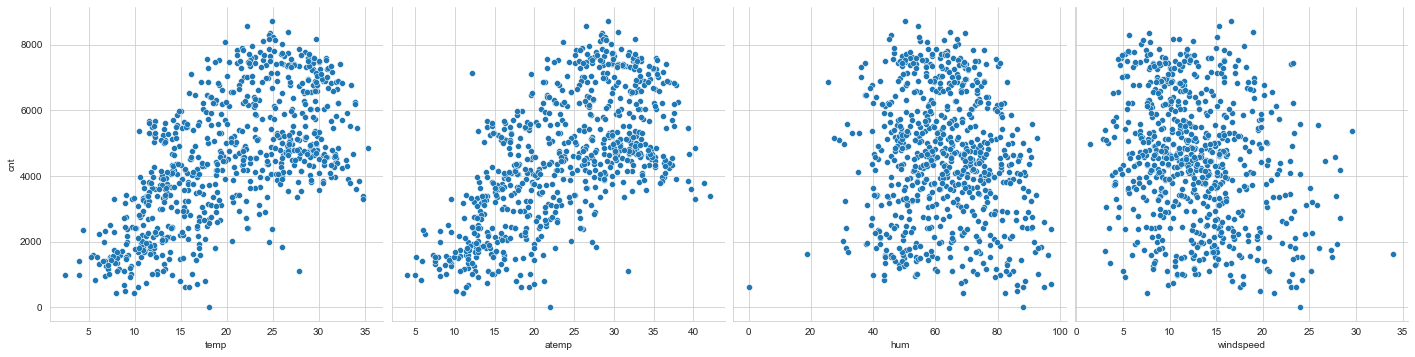

In [230]:
sns.set_style("whitegrid")
sns.pairplot(data=cleaned_data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1,diag_kind=None);

### Observations

- The number of rentals per day seem to be increasing with temperature and adjusted temperature
- adjusted temperature and temperature have similar trends
- hum vs cnt has two outliers below 20
- windspeed vs cnt has one outlier above 30

## Outliers in Continuous Variables vs cnt

In [231]:
## Dropping outliers in continuous variables

#outliers in hum
cleaned_data = cleaned_data.drop(index = cleaned_data[(cleaned_data['hum'] < 20)].index)

#outliers in windspeed
cleaned_data = cleaned_data.drop(index = cleaned_data[(cleaned_data['windspeed'] > 30)].index)

In [232]:
# Looking at correlation with continuous variables 
correlation = cleaned_data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.631100
temp,0.627300
hum,-0.119900
windspeed,-0.228000


In [233]:
cleaned_data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991691
atemp,0.991691,1.000000


In [234]:
#Since, the correlation between temp and atemp is almost 1, one of them could be dropped.
cleaned_data = cleaned_data.drop(columns=['atemp'])


In [235]:
cleaned_data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.125376,-0.156453
hum,0.125376,1.000000,-0.233014
windspeed,-0.156453,-0.233014,1.000000


- There's no signifcant correlation between atemp and hum , windspeed.
- Hence these are not dropped for now.

In [236]:
cleaned_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Visualizing Categorical Variables 

In [237]:
# Replacing numbers with labels 
#categorical_column = 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'

season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

#year_labels =  {0: 2018, 1:2019}

mnth_labels = {
    1 : 'jan',
    2 : 'feb',
    3 : 'mar',
    4 : 'apr',
    5 : 'may',
    6 : 'jun',
    7 : 'jul',
    8 : 'aug',
    9 : 'sep',
    10 : 'oct',
    11 : 'nov',
    12 : 'dec'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sun',
    1 : 'Mon',
    2 : 'Tue',
    3 : 'Wed',
    4 : 'Thu',
    5 : 'Fri',
    6 : 'Sat'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light_snow_or_rain'
}

# holiday_labels= {
#     0 : 'Non-Holiday',
#     1:'Holiday'
# }

# workingday_labels = {
#     0 : 'Non-working',
#     1:'working'
# }



In [238]:
# replacing numerals with labels 
categorized_data=cleaned_data

In [239]:

categorized_data['season'] = categorized_data['season'].replace(season_labels)
#categorized_data['yr'] = categorized_data['yr'].replace(year_labels)
categorized_data['mnth'] = categorized_data['mnth'].replace(mnth_labels)
categorized_data['weekday'] = categorized_data['weekday'].replace(weekday_labels)
categorized_data['weathersit'] = categorized_data['weathersit'].replace(weathersit_labels)
#categorized_data['holiday'] = categorized_data['holiday'].replace(holiday_labels)
#categorized_data['workingday'] = categorized_data['workingday'].replace(workingday_labels)

categorized_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,jan,0,Sat,0,cloudy,14.110847,80.5833,10.749882,985
2,spring,0,jan,0,Sun,0,cloudy,14.902598,69.6087,16.652113,801
3,spring,0,jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
4,spring,0,jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
5,spring,0,jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


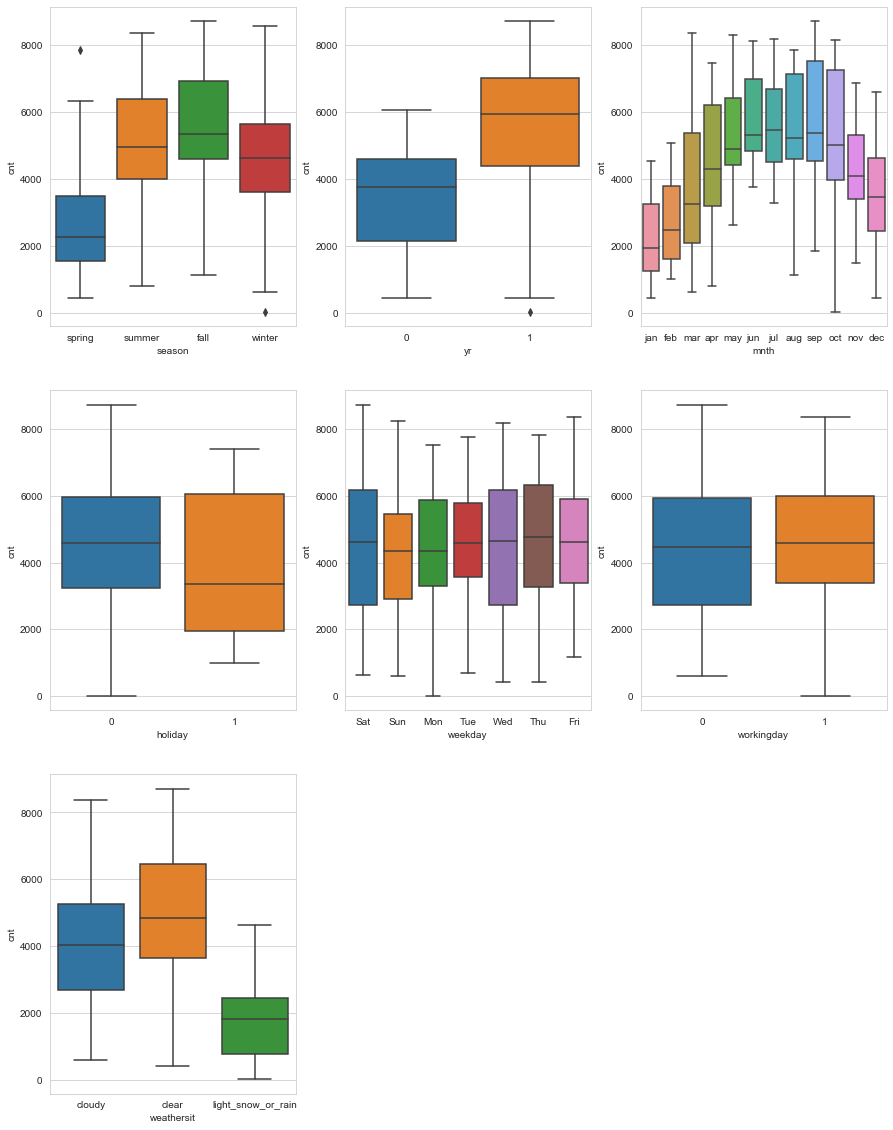

In [240]:
categorical_column = ['season', 'yr', 'mnth', 'holiday', 
                      'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(15, 20))
for index, col_name in enumerate(categorical_column):
    plt.subplot(3,3,index+1)
    sns.boxplot(x=col_name, y='cnt', data=categorized_data)

## Observations

## Outliers in Categorical Variables vs cnt 

In [241]:
categorized_data = categorized_data.drop(index = categorized_data[(categorized_data['season'] == 'spring') & (categorized_data['cnt'] > 7500)].index)

### Correlation 

<AxesSubplot:>

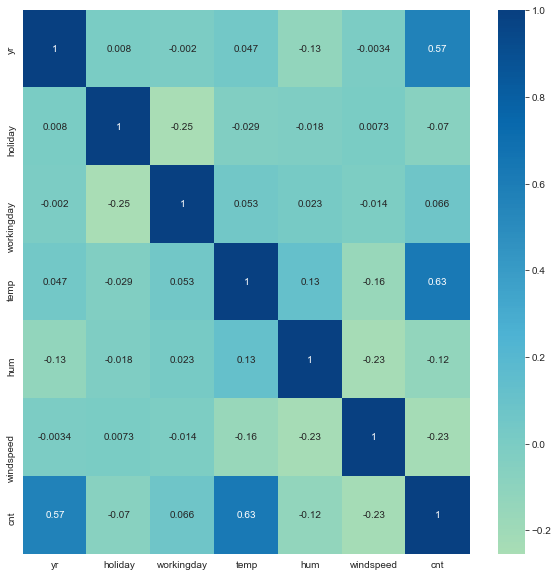

In [242]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(categorized_data.corr(),cmap='GnBu',center=0,annot=True)

- Highest correlation with cnt is seen in temp followed by yr

## Data Preparation
### Creating Dummy Variables

In [243]:
# creating dummy variable columns
season_dummy = pd.get_dummies(categorized_data['season'],drop_first=True)
mnth_dummy = pd.get_dummies(categorized_data['mnth'],drop_first=True)
weekday_dummy = pd.get_dummies(categorized_data['weekday'],drop_first=True)
weathersit_dummy = pd.get_dummies(categorized_data['weathersit'],drop_first=True)
#yr_dummy = pd.get_dummies(categorized_data['yr'],drop_first=True)
#holiday_dummy = pd.get_dummies(categorized_data['holiday'],drop_first=True)
#workingday_dummy = pd.get_dummies(categorized_data['workingday'],drop_first=True)


In [244]:
# adding dummy variable columns to the dataset . Dropping original columns
categorized_data = pd.concat([categorized_data,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)
categorized_data = categorized_data.drop(columns=['season','mnth','weekday','weathersit'])
categorized_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,light_snow_or_rain
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [245]:
categorized_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'cloudy', 'light_snow_or_rain'],
      dtype='object')

In [246]:
categorized_data.shape

(727, 29)

## Creating test and train set 

In [247]:
df_train, df_test = train_test_split(categorized_data, train_size=0.7, random_state=100)
print(f"train size : {df_train.shape}")
print(f"test size : {df_test.shape}")

train size : (508, 29)
test size : (219, 29)


## Scaling Numerical Features 

In [248]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(df_train[num_vars])
df_train[num_vars] = numerical_scaler.transform(df_train[num_vars])

In [249]:
#X_train , y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [250]:
y_train.head()

instant
729    1796
584    7273
114    4191
581    6824
664    7444
Name: cnt, dtype: int64

In [251]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,light_snow_or_rain
instant,,,,,,,,,,,,,,,,,,,,,
729,1,0,0,0.245101,0.297847,0.772556,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
584,1,0,1,0.843205,0.614235,0.186856,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
114,0,0,0,0.651106,0.767942,0.375373,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
581,1,0,0,0.914852,0.484450,0.538883,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
664,1,0,1,0.606455,0.762559,0.225825,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [252]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'cloudy', 'light_snow_or_rain'],
      dtype='object')

## Modelling
### Approach

- A mixed approach is followed.
- 15 Best columns are chosen using RFE
- And then p-value method is followed for further elimination.

#### Recursive Feature Elimination

In [258]:
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [259]:
#RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
21,1,True,Sat
19,1,True,sep
17,1,True,nov
16,1,True,may
15,1,True,mar
26,1,True,cloudy
8,1,True,winter
13,1,True,jul
27,1,True,light_snow_or_rain


In [260]:
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sat', 'sep', 'nov', 'may', 'mar', 'cloudy', 'winter', 'jul',
       'light_snow_or_rain', 'spring', 'windspeed', 'hum', 'temp',
       'workingday'], dtype=object)

### Manual Elimination 

### We generally have these kind of cases

- High p-value, high VIF : Drop these
- High p, low VIF : Remove these first
- Low p, high VIF: Remove these after the above
- Low p, low VIF

In [261]:
# Following a stepwise elimination
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

### model 1 

- Using features selected by RFE 

In [262]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          9.11e-192
Time:                        15:19:10   Log-Likelihood:                -4083.0
No. Observations:                 508   AIC:                             8198.
Df Residuals:                     492   BIC:                             8266.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2355.8045    233

# model2
- DROPING nov because of high p-value


In [263]:
del_feature = 'nov'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     198.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.32e-192
Time:                        15:21:15   Log-Likelihood:                -4084.3
No. Observations:                 508   AIC:                             8199.
Df Residuals:                     493   BIC:                             8262.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2312.9532    232

### model3
- DROPING 'may' because of high p-value

In [264]:
del_feature = 'may'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.13e-192
Time:                        15:22:37   Log-Likelihood:                -4087.4
No. Observations:                 508   AIC:                             8203.
Df Residuals:                     494   BIC:                             8262.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2336.6997    233

### model4
DROPING 'mar' because of high p-value

In [265]:
del_feature = 'mar'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.76e-192
Time:                        15:23:27   Log-Likelihood:                -4091.3
No. Observations:                 508   AIC:                             8209.
Df Residuals:                     495   BIC:                             8264.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2366.7245    234

## Verifying MultiCollinearity

In [266]:
vif(X_train[selected_features])

                 index        vif
0                const  47.106167
11                temp   3.219803
8               spring   2.716109
10                 hum   2.145313
5               winter   1.845361
4               cloudy   1.732661
12          workingday   1.669277
2                  Sat   1.654191
7   light_snow_or_rain   1.455505
6                  jul   1.358878
9            windspeed   1.182333
3                  sep   1.110929
1                   yr   1.047067


- VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

## Final Model 

In [267]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.76e-192
Time:                        15:26:31   Log-Likelihood:                -4091.3
No. Observations:                 508   AIC:                             8209.
Df Residuals:                     495   BIC:                             8264.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2366.7245    234

## Residual Analysis

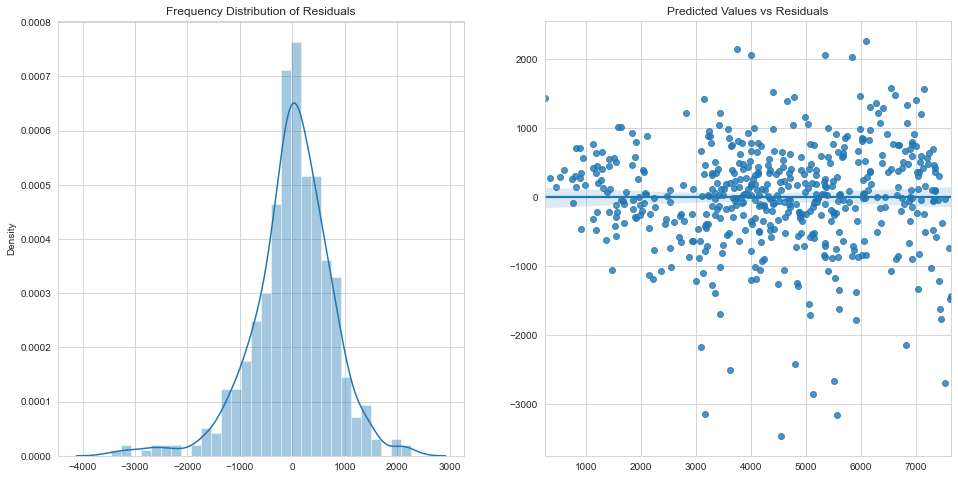

In [272]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)

fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(y_train_pred,y_train - y_train_pred,ax=ax[1])

plt.show()

In [270]:
# Mean of Residuals
(y_train-y_train_pred).mean()

5.8060852713574925e-12

### R-squared score on the train set

In [284]:
r2_score(y_train, y_train_pred)

0.8453113209047888

## Model Predictions 

In [275]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [276]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

### R-squared score on the test set

In [281]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8187856230055156

## Model evaluation 

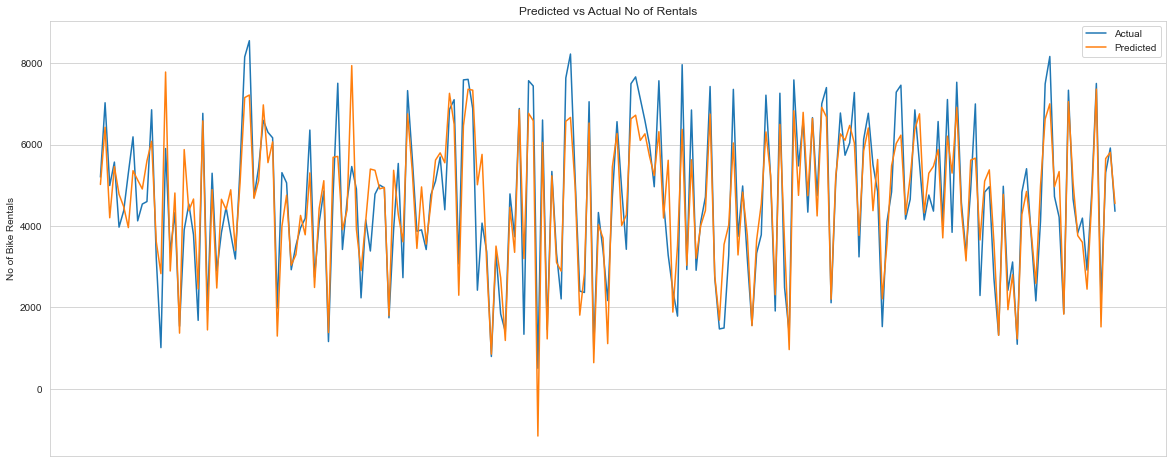

In [278]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()



- Predicted vs observed value plots shows that the model is reasonably accurate.

## Conclusion

### Significant variables to predict the demand for shared bikes
- yr                
- Sat               
- sep               
- cloudy            
- winter            
- jul               
- light_snow_or_rain
- spring            
- windspeed         
- hum               
- temp              
- workingday        
    



### Final Model built on training data set explains 84% of the variability and achieves 81% on test data.